## Normality Test

In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

In [2]:
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t -1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand)
    return paths

In [4]:
S0 = 100
r = 0.05
sigma = 0.2
T = 1.0
M = 250
I = 250000
np.random.seed(99)

In [5]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [6]:
S0 * math.exp(r * T)

105.12710963760242

In [7]:
paths[-1].mean()

105.1169378510267

Text(0, 0.5, 'index level')

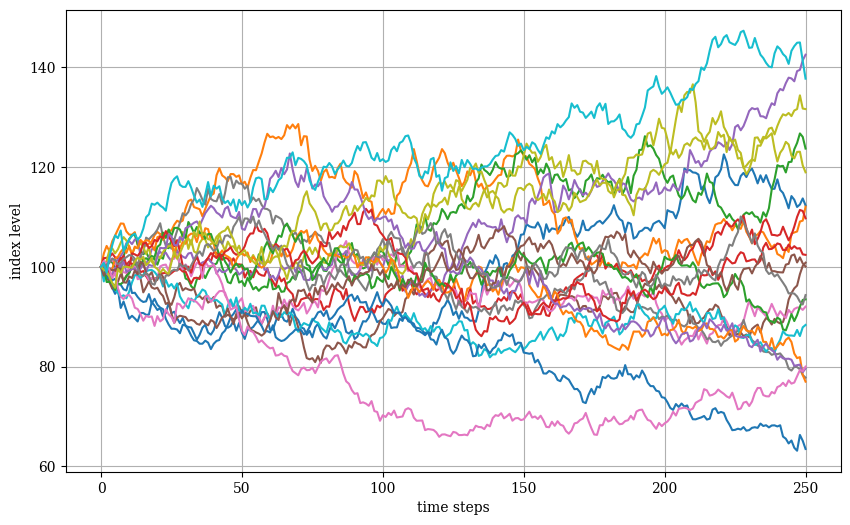

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :20])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [9]:
paths[:, 0].round(4)

array([100.    ,  99.8334,  98.2786,  97.7087,  95.8066,  94.5665,
        95.5016,  91.7422,  93.0194,  91.2828,  89.5864,  90.1712,
        89.6371,  89.0293,  90.7297,  90.7251,  90.3621,  90.4108,
        92.9258,  92.195 ,  91.3298,  91.7002,  90.0565,  90.7157,
        92.7706,  90.6865,  90.9839,  89.6719,  88.69  ,  89.7248,
        88.1375,  87.9138,  87.8159,  86.6478,  85.3779,  86.3755,
        87.7785,  88.3756,  86.7917,  86.3919,  87.2882,  89.05  ,
        90.8917,  89.7667,  88.1079,  87.7784,  88.1122,  89.1069,
        87.1731,  88.7328,  86.7685,  85.5282,  87.3706,  87.5521,
        87.9289,  88.689 ,  89.4819,  90.8959,  90.9288,  89.5221,
        87.3657,  87.4137,  89.0744,  90.6672,  90.4154,  89.2647,
        88.9924,  89.8388,  91.5778,  89.9893,  89.2698,  87.8367,
        87.6015,  86.3565,  87.1559,  85.8533,  87.8455,  88.581 ,
        86.9985,  86.0615,  85.6048,  87.2208,  88.6046,  87.6745,
        89.0051,  90.0755,  89.3168,  86.9336,  86.5996,  87.1

In [10]:
log_returns = np.log(paths[1:] / paths[0:-1])

In [11]:
log_returns[:, 0].round(4)

array([-0.0017, -0.0157, -0.0058, -0.0197, -0.013 ,  0.0098, -0.0402,
        0.0138, -0.0188, -0.0188,  0.0065, -0.0059, -0.0068,  0.0189,
       -0.    , -0.004 ,  0.0005,  0.0274, -0.0079, -0.0094,  0.004 ,
       -0.0181,  0.0073,  0.0224, -0.0227,  0.0033, -0.0145, -0.011 ,
        0.0116, -0.0178, -0.0025, -0.0011, -0.0134, -0.0148,  0.0116,
        0.0161,  0.0068, -0.0181, -0.0046,  0.0103,  0.02  ,  0.0205,
       -0.0125, -0.0187, -0.0037,  0.0038,  0.0112, -0.0219,  0.0177,
       -0.0224, -0.0144,  0.0213,  0.0021,  0.0043,  0.0086,  0.0089,
        0.0157,  0.0004, -0.0156, -0.0244,  0.0006,  0.0188,  0.0177,
       -0.0028, -0.0128, -0.0031,  0.0095,  0.0192, -0.0175, -0.008 ,
       -0.0162, -0.0027, -0.0143,  0.0092, -0.0151,  0.0229,  0.0083,
       -0.018 , -0.0108, -0.0053,  0.0187,  0.0157, -0.0106,  0.0151,
        0.012 , -0.0085, -0.027 , -0.0038,  0.0069, -0.0193,  0.0055,
        0.0193,  0.0159, -0.0008,  0.0088,  0.0176, -0.013 , -0.0146,
        0.0035, -0.0

In [12]:
def print_statistics(array):
    '''  통계치 출력
    인수
    ====
    array : ndarray  통계치를 계산할 자료
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

In [13]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  62500000.00000
           min        -0.07132
           max         0.07027
          mean         0.00012
           std         0.01265
          skew        -0.00011
      kurtosis         0.00070


In [14]:
log_returns.mean() * M + 0.5 * sigma ** 2

0.0499999999999999

In [15]:
log_returns.std() * math.sqrt(M)

0.2000000000000003

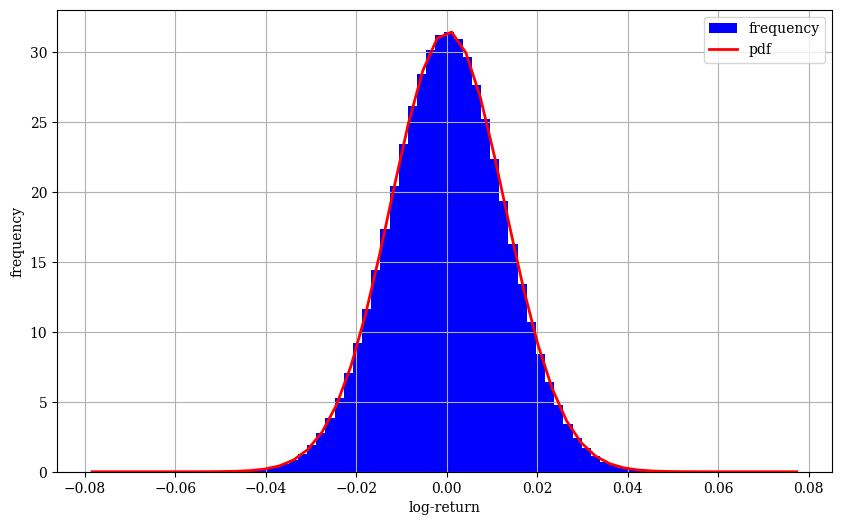

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True, label='frequency', color='b')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)), 'r', lw=2.0, label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

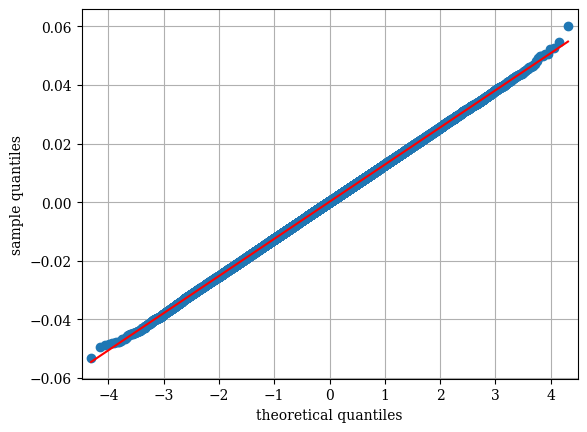

In [17]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [18]:
def normality_tests(arr):
    ''' 주어진 데이타가 정규분포인지 검정
    인수
    ====
    array: ndarray  통계치를 생성할 대상

    '''
    print("Skew of data set  %14.3f" %scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

In [19]:
normality_tests(log_returns.flatten())

Skew of data set          -0.000
Skew test p-value          0.712
Kurt of data set           0.001
Kurt test p-value          0.260
Norm test p-value          0.495


Text(0.5, 1.0, 'log data')

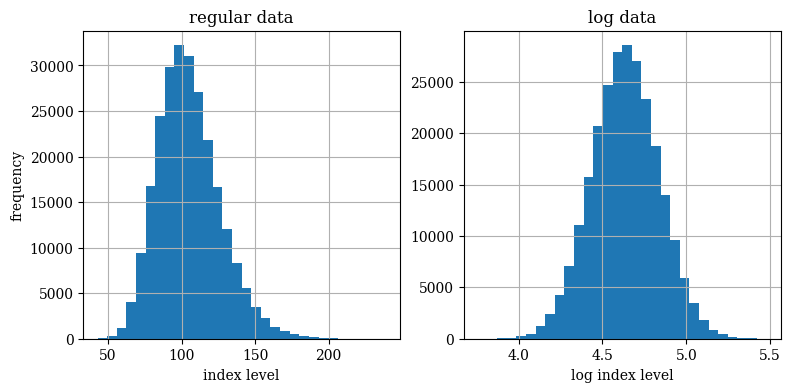

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [21]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.87705
           max       238.96767
          mean       105.11694
           std        21.18256
          skew         0.61126
      kurtosis         0.65475


In [22]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75834
           max         5.47633
          mean         4.63517
           std         0.19951
          skew         0.00034
      kurtosis        -0.00343


In [23]:
normality_tests(np.log(paths[-1]))

Skew of data set           0.000
Skew test p-value          0.945
Kurt of data set          -0.003
Kurt test p-value          0.731
Norm test p-value          0.940


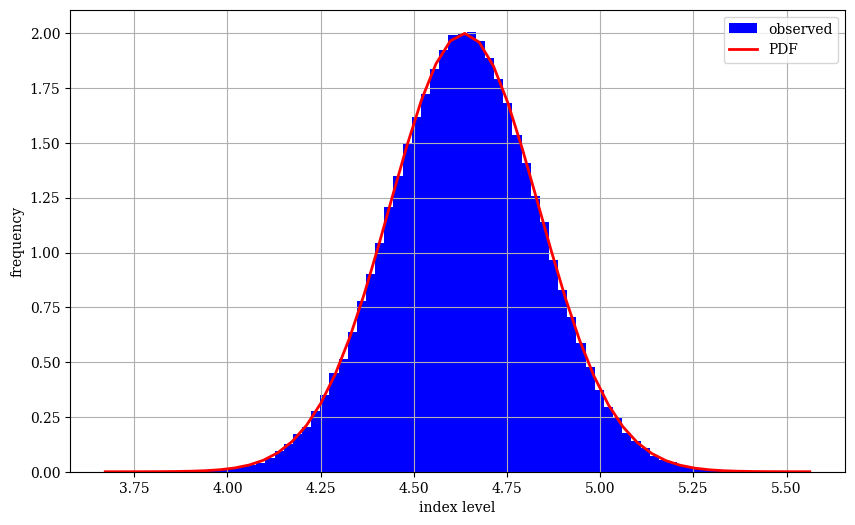

In [24]:
plt.figure(figsize=(10, 6))
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True, label='observed', color='b')
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()), 'r', lw=2.0, label='PDF')
plt.legend()

Text(0, 0.5, 'sample quantiles')

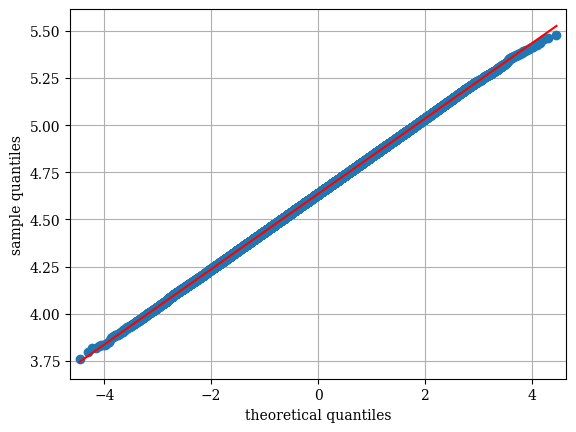

In [25]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

## Real Data Statistics

In [26]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 815.9 kB/s eta 0:00:00


In [27]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import FinanceDataReader as fdr
import yfinance as yf

In [28]:
from datetime import datetime
start = datetime(2000,1,1)
end = datetime(2024,1,31)

In [29]:
from os import close
data1 = pd.DataFrame()
data2 = pd.DataFrame()
data3 = pd.DataFrame()
data4 = pd.DataFrame()
data5 = pd.DataFrame()
data6 = pd.DataFrame()

data1 = yf.download('^GSPC', start, end) # S&P500
data2 = yf.download('^GDAXI',start, end) # DAX
data3 = yf.download('^KS11', start, end) # KOSPI
data4 = yf.download('^N225', start, end) # NIKKEI
data5 = yf.download('^HSCE', start, end) # HSCEI
data6 = yf.download('^IXIC', start, end) # NASDAQ

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [30]:
data7 = pd.merge(data1['Adj Close'].to_frame(), data2['Adj Close'].to_frame(),left_index=True, right_index=True, how='inner')
data7.columns=['SP500','DAX']

data8 = pd.merge(data3['Adj Close'].to_frame(), data4['Adj Close'].to_frame(),left_index=True, right_index=True, how='inner')
data8.columns=['KOSPI','NIKKEI']

data9 = pd.merge(data5['Adj Close'].to_frame(), data6['Adj Close'].to_frame(),left_index=True, right_index=True, how='inner')
data9.columns=['HSCEI','NASDAQ']

data10 = pd.merge(data7, data8,left_index=True, right_index=True, how='inner')
data = pd.merge(data10, data9,left_index=True, right_index=True, how='inner')

In [31]:
data.head()

,SP500,DAX,KOSPI,NIKKEI,HSCEI,NASDAQ
Date,,,,,,
2000-01-04,1399.420044,6586.950195,1059.040039,19002.859375,2082.929932,3901.689941
2000-01-05,1402.109985,6502.069824,986.309998,18542.550781,1956.569946,3877.540039
2000-01-06,1403.449951,6474.919922,960.789978,18168.269531,1904.199951,3727.129883
2000-01-07,1441.469971,6780.959961,948.650024,18193.410156,2004.510010,3882.620117
2000-01-11,1438.560059,6891.250000,981.330017,18850.919922,1996.300049,3921.189941


In [32]:
data.tail()

,SP500,DAX,KOSPI,NIKKEI,HSCEI,NASDAQ
Date,,,,,,
2024-01-24,4868.549805,16889.919922,2469.689941,36226.480469,5353.049805,15481.919922
2024-01-25,4894.160156,16906.919922,2470.340088,36236.468750,5468.709961,15510.500000
2024-01-26,4890.970215,16961.390625,2478.560059,35751.070312,5360.240234,15455.360352
2024-01-29,4927.930176,16941.710938,2500.649902,36026.941406,5408.930176,15628.040039
2024-01-30,4924.970215,16972.339844,2498.810059,36065.859375,5275.370117,15509.900391


In [33]:
data.to_csv('stocks.csv')

<Axes: xlabel='Date'>

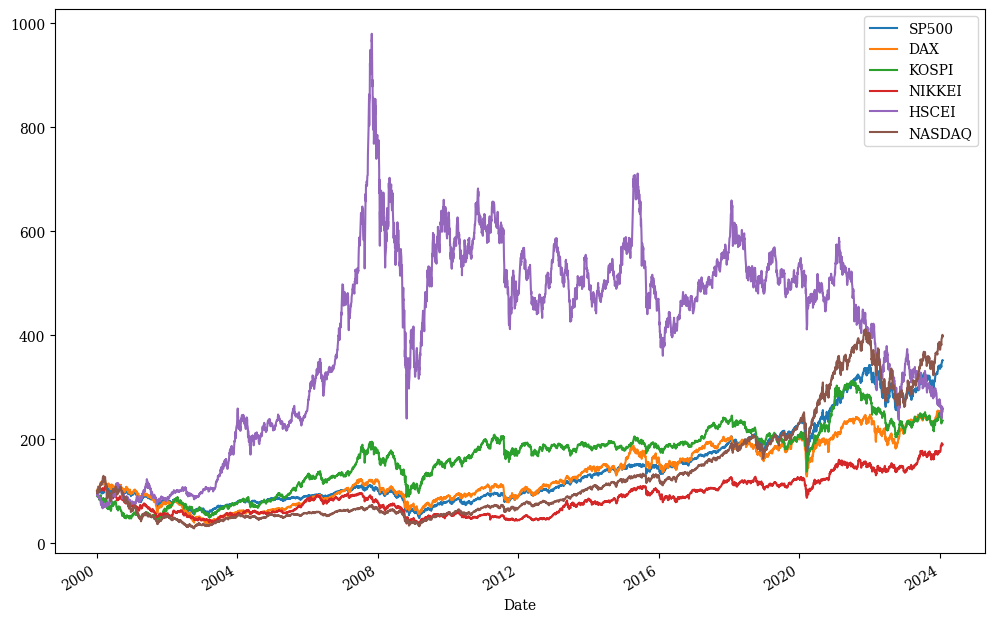

In [34]:
(data / data.iloc[0] * 100).plot(figsize=(12, 8))

In [35]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SP500,DAX,KOSPI,NIKKEI,HSCEI,NASDAQ
Date,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.001920,-0.012970,-0.071147,-0.024521,-0.062583,-0.006209
2000-01-06,0.000955,-0.004184,-0.026215,-0.020391,-0.027131,-0.039562
2000-01-07,0.026730,0.046182,-0.012716,0.001383,0.051338,0.040872
2000-01-11,-0.002021,0.016134,0.033869,0.035502,-0.004104,0.009885


array([[<Axes: title={'center': 'SP500'}>,
        <Axes: title={'center': 'DAX'}>],
       [<Axes: title={'center': 'KOSPI'}>,
        <Axes: title={'center': 'NIKKEI'}>],
       [<Axes: title={'center': 'HSCEI'}>,
        <Axes: title={'center': 'NASDAQ'}>]], dtype=object)

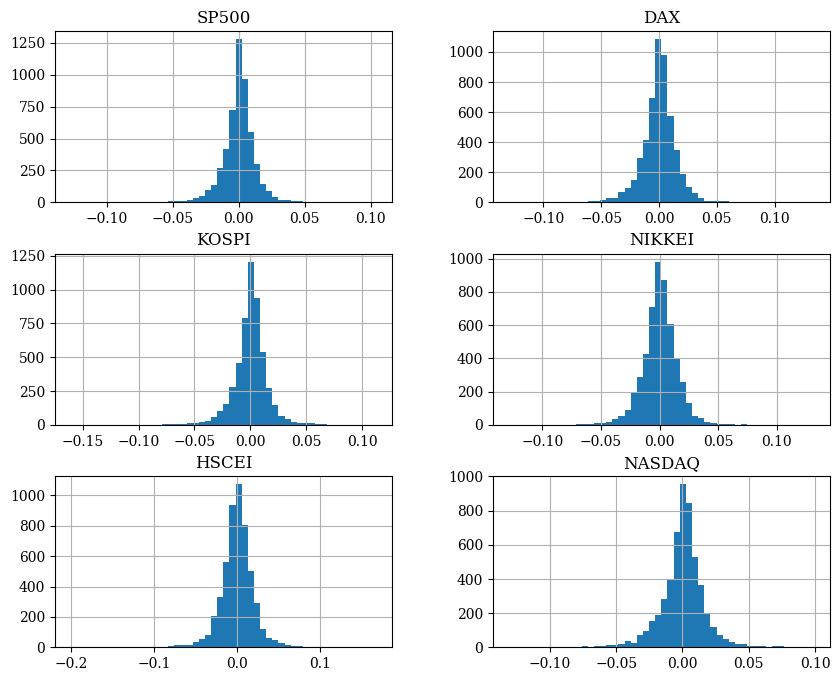

In [36]:
log_returns.hist(bins=50, figsize=(10, 8))

In [37]:
symbols = ['SP500', 'DAX', 'KOSPI', 'NIKKEI', 'HSCEI', 'NASDAQ']

In [38]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SP500
------------------------------
     statistic           value
------------------------------
          size      5243.00000
           min        -0.12765
           max         0.10424
          mean         0.00024
           std         0.01313
          skew        -0.44969
      kurtosis         9.54684

Results for symbol DAX
------------------------------
     statistic           value
------------------------------
          size      5243.00000
           min        -0.13055
           max         0.13463
          mean         0.00018
           std         0.01538
          skew        -0.11769
      kurtosis         6.31951

Results for symbol KOSPI
------------------------------
     statistic           value
------------------------------
          size      5243.00000
           min        -0.16115
           max         0.11284
          mean         0.00016
           std         0.01561
          skew        -0.59625
      kurtosis         8.

Text(0, 0.5, 'sample quantiles')

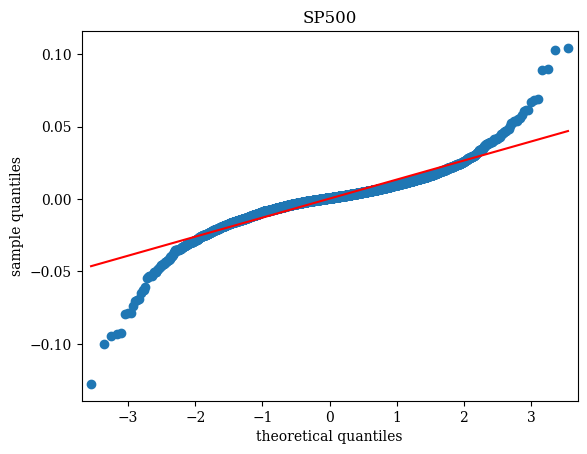

In [39]:
sm.qqplot(log_returns['SP500'].dropna(), line='s')
plt.title('SP500')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

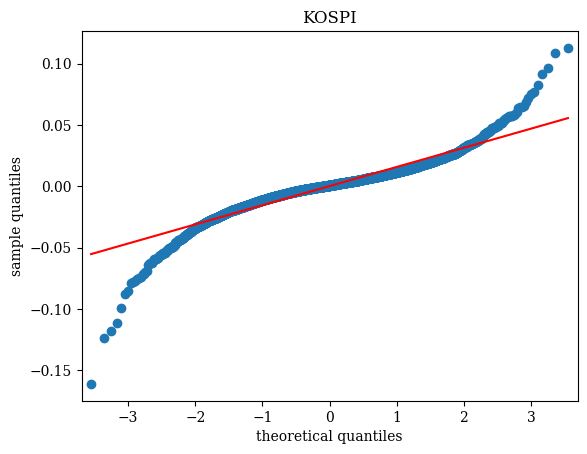

In [40]:
sm.qqplot(log_returns['KOSPI'].dropna(), line='s')
plt.title('KOSPI')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [41]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SP500
--------------------------------
Skew of data set          -0.450
Skew test p-value          0.000
Kurt of data set           9.547
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol DAX
--------------------------------
Skew of data set          -0.118
Skew test p-value          0.001
Kurt of data set           6.320
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol KOSPI
--------------------------------
Skew of data set          -0.596
Skew test p-value          0.000
Kurt of data set           8.721
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol NIKKEI
--------------------------------
Skew of data set          -0.507
Skew test p-value          0.000
Kurt of data set           6.983
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol HSCEI
--------------------------------
Skew of data set          -0.011
Skew test p-v

## Portfolio Optimization

In [48]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
from os import close
data1 = pd.DataFrame()
data2 = pd.DataFrame()
data3 = pd.DataFrame()
data4 = pd.DataFrame()
data5 = pd.DataFrame()
data6 = pd.DataFrame()

data1 = yf.download('^GSPC', start, end) # S&P500
data2 = yf.download('^GDAXI',start, end) # DAX
data3 = yf.download('^KS11', start, end) # KOSPI
data4 = yf.download('^N225', start, end) # NIKKEI
data5 = yf.download('^HSI', start, end) # HANGSENG
data6 = yf.download('^IXIC', start, end) # NASDAQ

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [90]:
data7 = pd.merge(data1['Adj Close'].to_frame(), data2['Adj Close'].to_frame(),left_index=True, right_index=True, how='inner')
data7.columns=['SP500','DAX']

data8 = pd.merge(data3['Adj Close'].to_frame(), data4['Adj Close'].to_frame(),left_index=True, right_index=True, how='inner')
data8.columns=['KOSPI','NIKKEI']

data9 = pd.merge(data5['Adj Close'].to_frame(), data6['Adj Close'].to_frame(),left_index=True, right_index=True, how='inner')
data9.columns=['HANGSENG','NASDAQ']

data10 = pd.merge(data7, data8,left_index=True, right_index=True, how='inner')
data = pd.merge(data10, data9,left_index=True, right_index=True, how='inner')

In [45]:
data.to_csv('stocks_p.csv')

In [91]:
symbols = ['SP500', 'DAX', 'KOSPI', 'NIKKEI', 'HANGSENG', 'NASDAQ']
noa = len(symbols)

In [92]:
rets = np.log(data / data.shift(1))

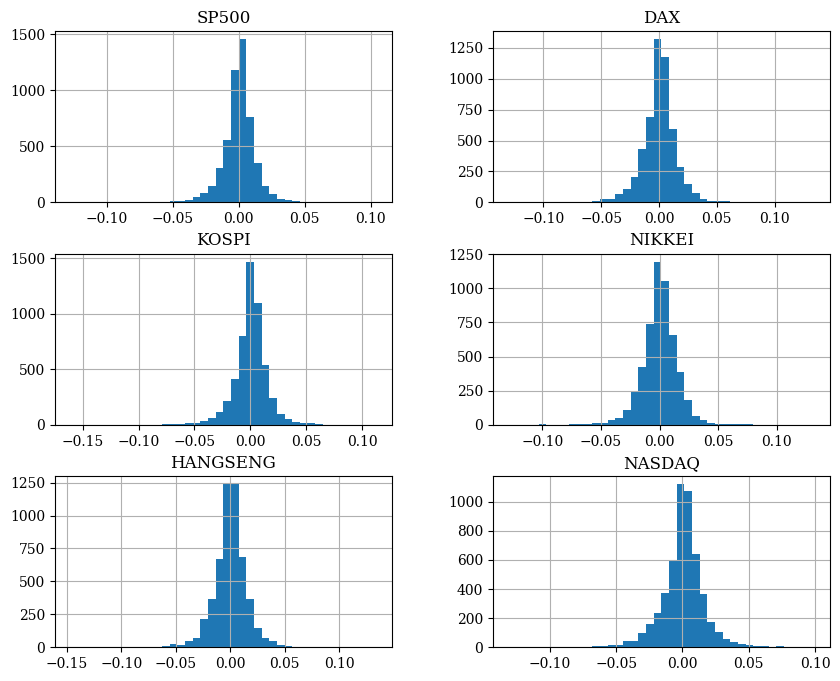

In [93]:
rets.hist(bins=40, figsize=(10, 8));

In [50]:
rets.mean() * 252

SP500     0.060282
DAX       0.045345
KOSPI     0.041127
NIKKEI    0.030698
HSCEI    -0.004006
NASDAQ    0.066117
dtype: float64

In [51]:
rets.cov() * 252

,SP500,DAX,KOSPI,NIKKEI,HSCEI,NASDAQ
SP500,0.043226,0.031745,0.012428,0.010932,0.013885,0.049411
DAX,0.031745,0.059336,0.021815,0.021632,0.023977,0.036905
KOSPI,0.012428,0.021815,0.061225,0.037100,0.038473,0.015784
NIKKEI,0.010932,0.021632,0.037100,0.061056,0.036624,0.012599
HSCEI,0.013885,0.023977,0.038473,0.036624,0.062974,0.017285
NASDAQ,0.049411,0.036905,0.015784,0.012599,0.017285,0.069468


In [52]:
rets.corr()

,SP500,DAX,KOSPI,NIKKEI,HSCEI,NASDAQ
SP500,1.000000,0.626818,0.241582,0.212797,0.266133,0.901696
DAX,0.626818,1.000000,0.361939,0.359396,0.392237,0.574815
KOSPI,0.241582,0.361939,1.000000,0.606805,0.619602,0.242024
NIKKEI,0.212797,0.359396,0.606805,1.000000,0.590646,0.193452
HSCEI,0.266133,0.392237,0.619602,0.590646,1.000000,0.261330
NASDAQ,0.901696,0.574815,0.242024,0.193452,0.261330,1.000000


<Axes: xlabel='Date'>

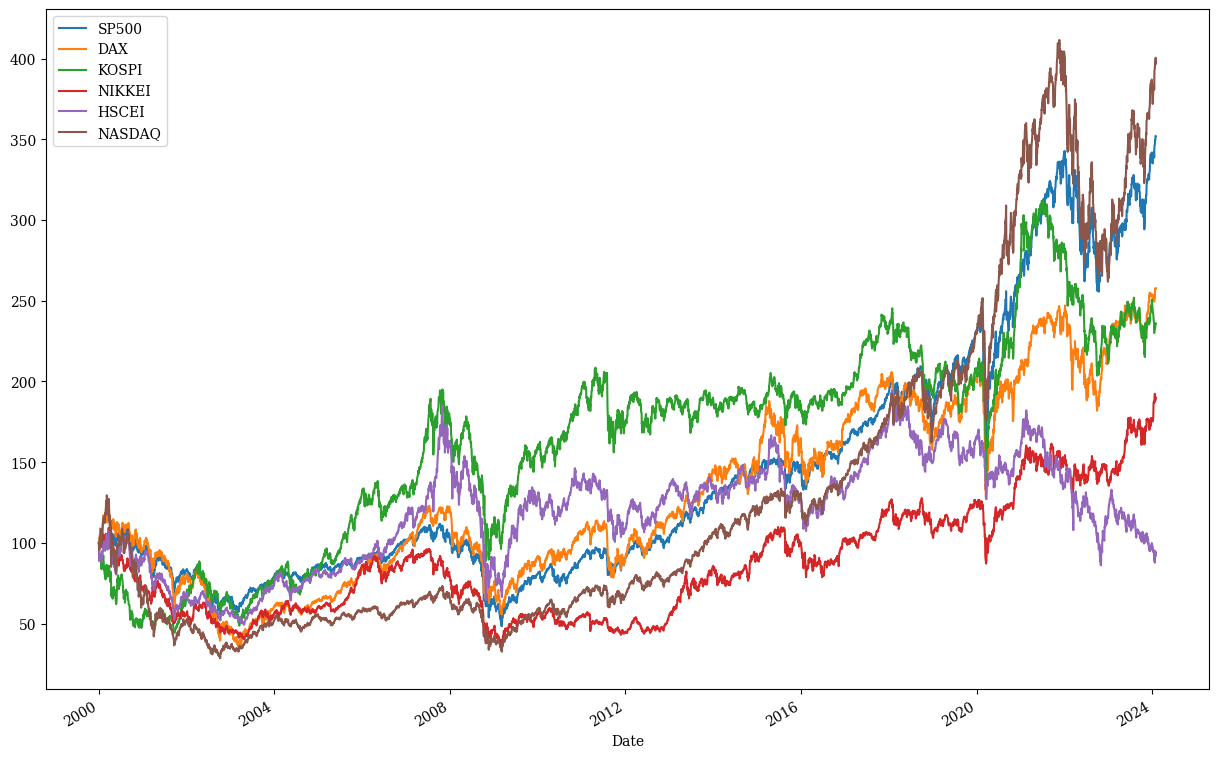

In [53]:
(data / data.iloc[0] * 100).plot(figsize=(15, 10))

In [54]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [55]:
weights

array([0.28965403, 0.20871242, 0.01013093, 0.20873199, 0.20897206,
       0.07379857])

In [56]:
weights.sum()

1.0

In [57]:
np.sum(rets.mean() * weights) * 252

0.037791582103999626

In [58]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  # 포트폴리오 분산의 기댓값

0.03069768001635466

In [59]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  # 포트폴리오 표준편차(변동성)의 기댓값

0.17520753413125434

In [60]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [61]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [62]:
prets = []
pvols = []
for p in range (25000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

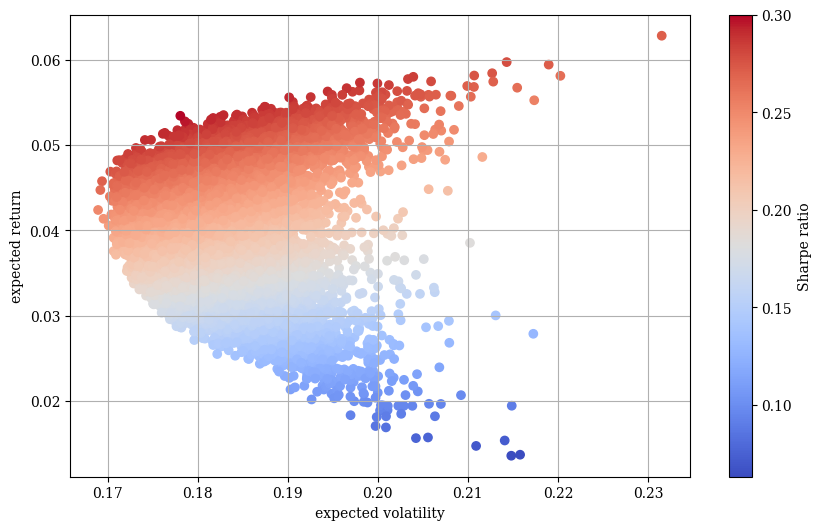

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
pvols = np.array(pvols)

In [64]:
import scipy.optimize as sco

In [65]:
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [66]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [67]:
bnds = tuple((0, 1) for x in range(noa))

In [68]:
eweights = np.array(noa * [1. / noa,])
eweights

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [69]:
min_func_sharpe(eweights)

-0.22652121472251419

In [70]:
%%time
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons)

CPU times: user 215 ms, sys: 1.51 ms, total: 217 ms
Wall time: 220 ms


In [71]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.30650174976561945
       x: [ 7.485e-01  0.000e+00  2.295e-01  2.207e-02  7.416e-17
            4.754e-17]
     nit: 11
     jac: [ 3.609e-05  2.437e-02 -1.119e-04 -6.060e-05  2.113e-01
            1.896e-02]
    nfev: 77
    njev: 11

In [72]:
opts['x'].round(3)

array([0.748, 0.   , 0.229, 0.022, 0.   , 0.   ])

In [73]:
port_ret(opts['x']).round(3)

0.055

In [74]:
port_vol(opts['x']).round(3)

0.18

In [75]:
port_ret(opts['x']) / port_vol(opts['x'])

0.30650174976561945

In [76]:
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)

In [77]:
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.16808161117184486
       x: [ 4.979e-01  3.192e-02  1.567e-01  1.986e-01  1.149e-01
            0.000e+00]
     nit: 9
     jac: [ 1.681e-01  1.676e-01  1.682e-01  1.682e-01  1.679e-01
            1.948e-01]
    nfev: 63
    njev: 9

In [78]:
optv['x'].round(3)

array([0.498, 0.032, 0.157, 0.199, 0.115, 0.   ])

In [79]:
port_ret(optv['x']).round(3)

0.044

In [80]:
port_vol(optv['x']).round(3)

0.168

In [81]:
port_ret(optv['x']) / port_vol(optv['x'])

0.2590538000963878

In [82]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [83]:
bnds = tuple((0, 1) for x in weights)

In [84]:
%%time
trets = np.linspace(0.02, 0.1, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 14.4 s, sys: 41.5 ms, total: 14.4 s
Wall time: 15 s


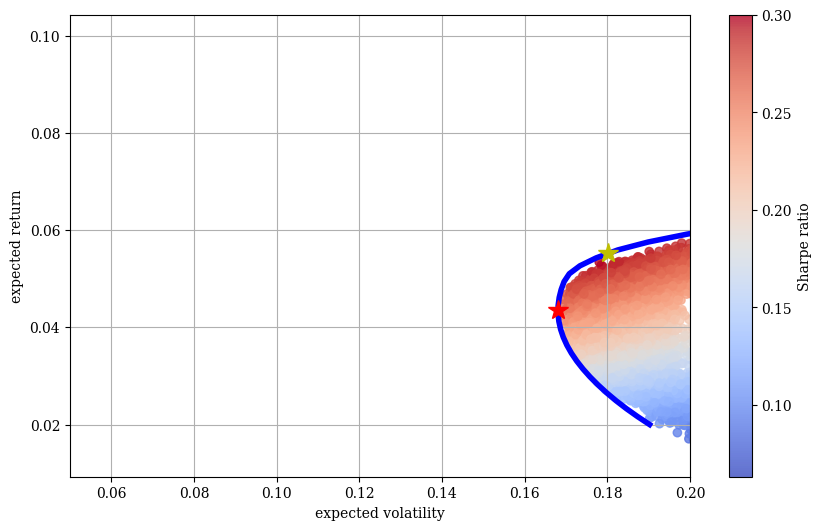

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', alpha=0.8, cmap='coolwarm')  # 무작위 포트폴리오
plt.plot(tvols, trets, 'b', lw=4.0)  # 효율적 투자선
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15.0)   # 최대 샤프지수를 가진 포트폴리오
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15.0)   # 최소 분산 포트폴리오
plt.grid(True)
plt.xlim([0.05, 0.2])
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [86]:
bnds = len(symbols) * [(0, 1),]
bnds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [87]:
cons = {'type': 'eq', 'fun': lambda weights: weights.sum() - 1}

In [88]:
def port_return(rets, weights):
    return np.dot(rets.mean(), weights) * 252  # annualized
def port_volatility(rets, weights):
    return np.dot(weights, np.dot(rets.cov() * 252 , weights)) ** 0.5  # annualized
def port_sharpe(rets, weights):
    return port_return(rets, weights) / port_volatility(rets, weights)

In [94]:
opt_weights ={}
for year in range(2010, 2024):
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']
    ow = sco.minimize(lambda weights: -port_sharpe(rets_, weights),
                  len(symbols) * [1 / len(symbols)],
                  bounds=bnds,
                  constraints=cons)['x']
    opt_weights[year] = ow.round(4)

In [ ]:
opt_weights

{2010: array([0.    , 0.1301, 0.7715, 0.    , 0.    , 0.0984]),
 2011: array([1., 0., 0., 0., 0., 0.]),
 2012: array([0.    , 0.3996, 0.    , 0.3706, 0.2298, 0.    ]),
 2013: array([0.    , 0.    , 0.    , 0.1912, 0.    , 0.8088]),
 2014: array([0.9481, 0.    , 0.    , 0.0519, 0.    , 0.    ]),
 2015: array([0.    , 0.299 , 0.    , 0.4653, 0.    , 0.2357]),
 2016: array([0.9207, 0.    , 0.0793, 0.    , 0.    , 0.    ]),
 2017: array([0.3991, 0.    , 0.1739, 0.    , 0.3008, 0.1263]),
 2018: array([0., 0., 0., 0., 0., 1.]),
 2019: array([0.7118, 0.0254, 0.    , 0.2628, 0.    , 0.    ]),
 2020: array([0.    , 0.    , 0.5746, 0.    , 0.    , 0.4254]),
 2021: array([0.9365, 0.0635, 0.    , 0.    , 0.    , 0.    ]),
 2022: array([0., 0., 0., 0., 1., 0.]),
 2023: array([0.    , 0.0572, 0.    , 0.367 , 0.    , 0.5759])}

### Fama-French 5 Factor

In [2]:
import pandas as pd
import numpy as np

!pip install linearmodels
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.2 MB/s eta 0:00:00


In [3]:
from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web
from linearmodels.asset_pricing import LinearFactorModel

import yfinance as yf
import plotly.graph_objects as go

In [4]:
ff_factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2012-05', end='2024-05')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 144 entries, 2012-05 to 2024-04
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  144 non-null    float64
 1   SMB     144 non-null    float64
 2   HML     144 non-null    float64
 3   RMW     144 non-null    float64
 4   CMA     144 non-null    float64
 5   RF      144 non-null    float64
dtypes: float64(6)
memory usage: 7.9 KB


<ipython-input-4-10708529707a>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2012-05', end='2024-05')[0]
<ipython-input-4-10708529707a>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2012-05', end='2024-05')[0]


In [6]:
ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench', start='2012-05', end='2024-05')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0) #리스크 프리미엄 계산: 섹터별 수익률 - 무위험 수익률
ff_portfolio_data

<ipython-input-6-fd7a37a32dcc>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench', start='2012-05', end='2024-05')[0]
<ipython-input-6-fd7a37a32dcc>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench', start='2012-05', end='2024-05')[0]
<ipython-input-6-fd7a37a32dcc>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench', 

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2012-05,-1.51,-14.59,-10.35,-5.49,-11.23,-9.54,-2.78,-6.48,-14.57,-5.50,-8.55,-7.79,-4.79,-0.92,-1.52,-9.22,-5.37
2012-06,3.85,6.36,5.82,-9.60,-0.85,3.26,5.08,6.22,4.76,0.00,1.39,-6.03,3.50,3.40,2.16,4.62,5.19
2012-07,0.33,-4.07,3.07,1.84,2.07,-1.28,3.04,-2.89,-1.32,2.87,1.23,0.46,-0.85,3.62,1.67,-1.10,0.21
2012-08,-0.16,5.00,2.39,8.11,6.23,2.78,-0.45,8.88,-1.22,0.76,5.31,2.92,0.47,-3.45,2.54,4.17,2.56
2012-09,1.08,8.57,3.83,0.01,3.25,1.05,2.79,5.60,3.83,3.84,-0.22,2.62,-1.09,2.10,1.72,3.63,4.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12,2.43,9.74,-0.47,4.58,8.27,7.37,1.79,12.44,9.23,6.97,9.60,4.57,6.36,1.26,4.96,6.34,3.53
2024-01,-1.28,-4.83,-0.65,-5.53,-3.71,-6.35,3.83,-1.65,0.43,-2.02,4.56,-16.18,-2.55,-3.47,0.77,0.25,1.65
2024-02,1.07,1.45,2.52,5.78,3.54,1.88,4.91,8.89,4.45,11.20,12.35,7.00,5.40,2.01,9.76,3.22,2.78


In [7]:
ff_factor_data = ff_factor_data.drop('RF',axis=1)
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 144 entries, 2012-05 to 2024-04
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  144 non-null    float64
 1   SMB     144 non-null    float64
 2   HML     144 non-null    float64
 3   RMW     144 non-null    float64
 4   CMA     144 non-null    float64
dtypes: float64(5)
memory usage: 10.8 KB


In [8]:
dt=ff_factor_data
dt.to_csv('ffdata.csv')

In [9]:
betas = []
for industry in ff_portfolio_data:
  step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index,industry], #종속변수
              exog=add_constant(ff_factor_data)).fit() #독립변수
  betas.append(step1.params.drop('const'))

In [10]:
betas = pd.DataFrame(betas, columns=ff_factor_data.columns, index=ff_portfolio_data.columns)
betas

,Mkt-RF,SMB,HML,RMW,CMA
Food,0.679755,-0.150785,-0.051295,0.323562,0.478517
Mines,1.092495,0.196749,0.159165,0.185784,0.568561
Oil,1.169766,0.240478,0.940916,-0.166059,0.464729
Clths,1.039689,0.338958,-0.165659,0.629507,0.098742
Durbl,1.122584,0.583821,-0.210694,0.239222,0.148307
Chems,1.107095,0.270743,0.311038,0.168606,0.172885
Cnsum,0.708193,-0.173501,-0.346147,0.182920,0.767132
Cnstr,1.095917,0.359057,0.005434,0.508000,-0.024984
Steel,1.410408,0.657983,0.471305,0.535179,0.195057
FabPr,1.000793,0.380464,0.089861,0.203810,-0.173565


In [11]:
lambdas = []
for period in ff_portfolio_data.index:
  step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index],
              exog=betas).fit()
  lambdas.append(step2.params)

In [12]:
lambdas = pd.DataFrame(lambdas, index=ff_portfolio_data.index, columns = betas.columns.tolist())
lambdas

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2012-05,-5.264856,-8.841280,-3.034715,3.758402,-3.731773
2012-06,2.981518,-7.908642,5.451640,-0.587571,3.873796
2012-07,0.879928,-0.561635,-1.798746,-2.310036,1.529512
2012-08,2.438694,1.365422,-1.073515,2.097530,-2.614789
2012-09,2.496886,1.821026,-0.110146,-3.015106,3.207700
...,...,...,...,...,...
2023-12,4.683564,0.092514,0.467323,7.327170,-3.563518
2024-01,-1.257207,-10.701857,4.228176,5.848332,-1.118540
2024-02,5.819573,-4.322612,-2.546047,4.642287,-5.804386


In [13]:
model = LinearFactorModel(portfolios=ff_portfolio_data,
                          factors=ff_factor_data)
res = model.fit()
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6853
No. Factors:                          5   J-statistic:                    15.304
No. Observations:                   144   P-value                         0.2252
Date:                  Tue, Jun 11 2024   Distribution:                 chi2(12)
Time:                          03:01:43                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.1286     0.3764     2.9987     0.0027      0.3909      1.8662
SMB           -0.8369     0.5322    

In [14]:
window = 24
lambdas_rolling = lambdas.rolling(window).mean().dropna()
lambdas_rolling

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2014-04,1.576539,-1.035446,-0.131629,0.282788,-0.527252
2014-05,1.874566,-0.922483,0.038522,0.253238,-0.485211
2014-06,1.860984,-0.604363,-0.153115,0.223247,-0.589888
2014-07,1.694258,-0.515894,-0.025346,0.328249,-0.663898
2014-08,1.768329,-0.755796,0.026158,0.511145,-0.610076
...,...,...,...,...,...
2023-12,0.001014,-0.098651,1.692575,0.172578,0.473718
2024-01,0.132133,-0.457477,1.370743,0.945793,0.077526
2024-02,0.496888,-1.004693,0.813543,1.064385,-0.545129


In [15]:
colors = ['#ce4912','#fb8500','#042c71','#0b6ab0','#ffb703']
fig = go.Figure()

for factor,i in zip(['Mkt-RF','SMB','HML','RMW','CMA'],range(0,5)):
  fig.add_trace(go.Scatter(x=lambdas_rolling.index.astype('str'), y=lambdas_rolling[factor],mode='lines',line=dict(width=1,color=colors[i]),name=factor))

fig.update_layout(
        title = dict(text = 'Fama-Macbeth Linear Regression',font = dict(size=20,color='black')),
        legend=dict(orientation="h", yanchor="bottom", y=0.93, xanchor="right", x=0.4),
        autosize = True,
        showlegend = True,
        font = dict(size = 8, color = 'black'),
        plot_bgcolor = 'white',paper_bgcolor='white',
        width=1000,height=600,
        xaxis = dict(title = 'Date', showline = True, showgrid = False, showticklabels = True, zeroline=False,mirror = True,
                    linecolor = 'black', linewidth = 0.8,ticks = 'outside'),
        yaxis = dict(title = 'Factor Risk Premium', showline = True, showgrid = False, showticklabels = True,zeroline=False, mirror = True,
                    linecolor = 'black', linewidth = 0.8,ticks = 'outside'),
        annotations=[
        dict(xref='paper',yref='paper',x=1.08,y=1.20,align='right',
            text='Information',showarrow=False,font=dict(size=8,color='red')),
        dict(xref='paper',yref='paper',x=1.08,y=1.18,align='right',
            text='Linkedin: ~/chacehkk',showarrow=False,font=dict(size=8,color='grey')),
        dict(xref='paper',yref='paper',x=1.08,y=1.16,align='right',
            text='Github: ~/hyksun2015',showarrow=False,font=dict(size=8,color='grey')),
        dict(xref='paper',yref='paper',x=1.08,y=-0.08,align='right',
            text='Source: famafrench',showarrow=False,font=dict(size=8,color='black')),
        dict(xref='paper',yref='paper',x=1.08,y=-0.1,align='right',
            text='Data period: 2012.05.01 - 2023.12.31',showarrow=False,font=dict(size=8,color='black'))])